# Drive mount code

In [90]:
from google.colab import drive
drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


# Dataset Creation

## Download dataset 2



In [134]:
!gdown --id 1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A

Downloading...
From: https://drive.google.com/uc?id=1L7gRzRsyWzQ6jtRg86q81aVfKbREYv2A
To: /content/Dataset 2.csv
100% 999k/999k [00:00<00:00, 66.1MB/s]


## Import package

In [135]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace

warnings.filterwarnings('ignore')
torch.manual_seed(0)

## Read downloaded dataset

In [136]:
df = pd.read_csv('/content/Dataset 2.csv',encoding='unicode_escape')

In [137]:
df.columns ## columns name

Index(['text', 'polarity'], dtype='object')

In [138]:
df['polarity'].value_counts() ## get number of data in `polarity` class

0    8000
1    2314
Name: polarity, dtype: int64

In [139]:
df['text'].value_counts()

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÃÂ                                                   11
25-04-18                                                                                                                                         4
More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÃÂ Ã¢ÂÂ¦     4
suffering from chronic depression https://vine.co/v/iu3l2lPBhiKÃÂ                                                                               3
Good morning                                                                                                                                     3
                                                                                                                                                ..
@amerj thanks                                                                                                         

## Dataset splitting

In [140]:
## split dataset based on the class
traning_split_size = 0.8
df_class_1 = df[df['polarity'] == 1]
df_class_0 = df[df['polarity'] == 0]

trainSize = int(len(df_class_0) * traning_split_size)
Traning_class_0 = df_class_0[:trainSize]
Test_class_0 = df_class_0[trainSize:]

trainSize = int(len(df_class_1) * traning_split_size)
Traning_class_1 = df_class_1[:trainSize]
Test_class_1 = df_class_1[trainSize:]

In [141]:
## traning dataset create
li = [Traning_class_0,Traning_class_1]
frame = pd.concat(li, axis=0, ignore_index=True)
frame = shuffle(frame)
frame.reset_index(inplace=True, drop=True)
frame.to_csv('Train-Dataset.csv',index=False)
frame

,text,polarity
0,"@EwanB1988 HAHAHAHAHA. OMS, that made me laug...",0
1,"@BigSyke69 lol yea 2ish sounds about right, i ...",0
2,@StarrGazr Yes mam! There's nothing like start...,0
3,@metaphoricxeyes hmm let's see if it work! Yak...,0
4,@peter_shih 10x! I shall publish the 2nd part...,0
...,...,...
8246,@mistressmia lol so I guess it's more than jus...,0
8247,@Vivbb hÃ¯Â¿Â½... may lÃ¯Â¿Â½ chi?u nay tr?i n...,0
8248,"Natural L-Theanine for Anxiety, Panic Attacks ...",1
8249,@ClothCoutureLLC i guess i should specify... m...,0


In [142]:
## testing dataset create
li = [Test_class_0,Test_class_1]
frame = pd.concat(li, axis=0, ignore_index=True)
frame = shuffle(frame)
frame.reset_index(inplace=True, drop=True)
frame.to_csv('Test-Dataset.csv',index=False)
frame

,text,polarity
0,"@judehamilton no problems jude,will be a pleas...",0
1,I brought my favourite vanilla cookies from ik...,0
2,@jo_jo_ba it will be soon I'll let you know!,0
3,Engaging in physical activity decreases people...,1
4,has finally finished all of his exams!,0
...,...,...
2058,PARK BOM IS NOT CRAZYPARK BOM DEALS WITH DEPRE...,1
2059,We showing the lakers how to do magic,0
2060,last day of school,0
2061,"She definitely showed signs of alcoholism, but...",1


# Text cleaning

In [147]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys,re,string
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
from torchsummary import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace
try:
  import contractions
except:
  !pip install contractions
import contractions
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vectors, GloVe

import nltk
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('averaged_perceptron_tagger')
    nltk.data.find('brown')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
    nltk.download('brown')
    nltk.download('punkt')
from nltk import sent_tokenize,word_tokenize


warnings.filterwarnings('ignore')
torch.manual_seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [148]:
traning_df = pd.read_csv('/content/Train-Dataset.csv')
testing_df = pd.read_csv('/content/Test-Dataset.csv')

In [149]:
traning_df

,text,polarity
0,"@EwanB1988 HAHAHAHAHA. OMS, that made me laug...",0
1,"@BigSyke69 lol yea 2ish sounds about right, i ...",0
2,@StarrGazr Yes mam! There's nothing like start...,0
3,@metaphoricxeyes hmm let's see if it work! Yak...,0
4,@peter_shih 10x! I shall publish the 2nd part...,0
...,...,...
8246,@mistressmia lol so I guess it's more than jus...,0
8247,@Vivbb hÃ¯Â¿Â½... may lÃ¯Â¿Â½ chi?u nay tr?i n...,0
8248,"Natural L-Theanine for Anxiety, Panic Attacks ...",1
8249,@ClothCoutureLLC i guess i should specify... m...,0


In [150]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers. removibng miltiple full stop'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'\.+', ".", text)
    return text

def replace_text(text):
    text = str(text).lower()
    text = text.encode('ascii', 'ignore').decode('utf-8') 
    return text  


for dta in [traning_df,testing_df]:
  dta['text_cleaning'] = dta.text.apply(lambda x: x.strip().lower() )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x : " ".join(x.split()) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: contractions.fix(x) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: clean_text(x) )
  dta['text_cleaning'] = dta.text_cleaning.apply(lambda x: replace_text(x) )
  dta['number_of_word'] = dta.text_cleaning.apply(lambda x: len(word_tokenize(x)) )
  dta['number_of_letter'] = dta.text_cleaning.apply(lambda x: len(x) )
  del dta['text']
  dta['text'] = dta['text_cleaning'] 
  del dta['text_cleaning']



for dta in [traning_df,testing_df]:
  word_count_zero = dta[dta['number_of_word'] == 0]
  dta.drop(word_count_zero.index,inplace=True)
  letter_count_zero = dta[dta['number_of_letter'] == 0]
  dta.drop(letter_count_zero.index,inplace=True)


# # Training DF
# traning_df['text_cleaning'] = traning_df.text.apply(lambda x: x.strip().lower() )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x : " ".join(x.split()) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: contractions.fix(x) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: clean_text(x) )
# traning_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x: replace_text(x) )

# # Testing DF
# testing_df['text_cleaning'] = testing_df.text.apply(lambda x: x.strip().lower() )
# testing_df['text_cleaning'] = traning_df.text_cleaning.apply(lambda x : " ".join(x.split()) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: contractions.fix(x) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: clean_text(x) )
# testing_df['text_cleaning'] = testing_df.text_cleaning.apply(lambda x: replace_text(x) )


In [151]:
traning_df

,polarity,number_of_word,number_of_letter,text
0,0,9,43,hahahahaha oms that made me laugh a lot xx
1,0,23,99,lol yea sounds about right i love my sleep b...
2,0,19,95,starrgazr yes mam there is nothing like starti...
3,0,26,130,metaphoricxeyes hmm let us see if it work yaks...
4,0,12,67,petershih i shall publish the part or the se...
...,...,...,...,...
8246,0,12,61,mistressmia lol so i guess it is more than jus...
8247,0,12,45,vivbb h may l chiyou nay tri nng ch hem c nng
8248,1,9,85,natural ltheanine for anxiety panic attacks an...
8249,0,13,70,clothcouturellc i guess i should specify my ki...


In [152]:
alltext_length = []
allword_length = []
for val in traning_df.text:
  word_tok = word_tokenize(val)
  alltext_length.append(len(val))
  allword_length.append(len(word_tok))

print(max(alltext_length))
print(max(allword_length))

# traning_df.text.apply(lambda x: len(x) )

289
62


In [153]:
for val in traning_df.text:
  word_tok = word_tokenize(val)
  if len(word_tok) <= 1:
    print(val)

reading
lonlonraanch
 whaaatever
shaundiviney
     subway
  updates
beeeeeeed
  thirsty
 thanks
makemescream
depression  
depression  
depression  
 with 
may    
 thanks
picture
 yup
quickshooter                
ferngully
party 
jonathanrknight
 thanks
twittermaniaaaaaaaaaaa
 sorite
radiogrinch 
depression  
katelyniscool   
shopping
remysoon
incoming
oneofusisfdup
depression  
spurofmoment
name
name
fairyfreia          
comeagainjen   
depression  
houseeee
 thanks
scarych         
depression
realworldmom
llisalang
around


In [154]:
traning_df.to_csv('/content/Train-Dataset-prcessed.csv',index=False)
testing_df.to_csv('/content/Test-Dataset-prcessed.csv',index=False)

# Training & `LSTM` modeling

In [177]:
# import some importent library or packages 
import matplotlib.pyplot as plt
import warnings
import time,sys,re,string
import copy

import pandas as pd
import numpy as np
import cv2
import os
import pathlib
import zipfile
import torch
import torchvision
from torchvision import models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

import torch.optim as optim
import pathlib
import shutil
from pathlib import Path
from collections import Counter
!pip install torchsummary
!pip install torchinfo
from torchinfo import summary
from sklearn.utils import shuffle
!pip install torchviz
from torchviz import make_dot, make_dot_from_trace
try:
  import contractions
except:
  !pip install contractions
import contractions
from torchtext.legacy.data import Field, TabularDataset, BucketIterator
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vectors, GloVe
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

import nltk
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('averaged_perceptron_tagger')
    nltk.data.find('brown')
except LookupError:
    nltk.download('averaged_perceptron_tagger')
    nltk.download('brown')
    nltk.download('punkt')
from nltk import sent_tokenize,word_tokenize


warnings.filterwarnings('ignore')
torch.manual_seed(0)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [178]:
traning_df = pd.read_csv('/content/Train-Dataset-prcessed.csv')
testing_df = pd.read_csv('/content/Test-Dataset-prcessed.csv')

In [179]:
traning_df

,polarity,number_of_word,number_of_letter,text
0,0,9,43,hahahahaha oms that made me laugh a lot xx
1,0,23,99,lol yea sounds about right i love my sleep b...
2,0,19,95,starrgazr yes mam there is nothing like starti...
3,0,26,130,metaphoricxeyes hmm let us see if it work yaks...
4,0,12,67,petershih i shall publish the part or the se...
...,...,...,...,...
8239,0,12,61,mistressmia lol so i guess it is more than jus...
8240,0,12,45,vivbb h may l chiyou nay tri nng ch hem c nng
8241,1,9,85,natural ltheanine for anxiety panic attacks an...
8242,0,13,70,clothcouturellc i guess i should specify my ki...


In [180]:
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(tokenize='spacy', lower=True, include_lengths=True, batch_first=True)
fields = [('polarity', label_field),  ('text', text_field)]


train_data = TabularDataset(path="/content/Train-Dataset-prcessed.csv",
                                 format="csv",
                                  fields=fields,
                                 skip_header=True)

valid_data = TabularDataset(path="/content/Test-Dataset-prcessed.csv",
                                 format="csv",
                                  fields=fields,
                                 skip_header=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_iter = BucketIterator(train_data, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid_data, batch_size=32, sort_key=lambda x: len(x.text),
                            device=device, sort=True, sort_within_batch=True)


text_field.build_vocab(train_data,) # min_freq=3,vectors = "glove.6B.100d"
label_field.build_vocab(train_data)

In [181]:
#No. of unique tokens in text
print("Size of TEXT vocabulary:",len(text_field.vocab))

#No. of unique tokens in label
print("Size of LABEL vocabulary:",len(label_field.vocab))

#Commonly used words
print(text_field.vocab.freqs.most_common(10))  

#Word dictionary
print(text_field.vocab.stoi)   

Size of TEXT vocabulary: 64
Size of LABEL vocabulary: 3
[('8', 459), ('6', 446), ('7', 427), ('9', 407), ('5', 407), ('13', 379), ('10', 376), ('11', 369), ('12', 359), ('4', 329)]
defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f7352001d10>>, {'<unk>': 0, '<pad>': 1, '8': 2, '6': 3, '7': 4, '5': 5, '9': 6, '13': 7, '10': 8, '11': 9, '12': 10, '4': 11, '15': 12, '14': 13, '16': 14, '18': 15, '17': 16, '3': 17, '19': 18, '21': 19, '20': 20, '23': 21, '22': 22, '24': 23, '2': 24, '25': 25, '26': 26, '27': 27, '29': 28, '28': 29, '1': 30, '30': 31, '32': 32, '31': 33, '36': 34, '38': 35, '39': 36, '45': 37, '41': 38, '33': 39, '34': 40, '42': 41, '43': 42, '48': 43, '49': 44, '44': 45, '47': 46, '46': 47, '37': 48, '40': 49, '35': 50, '50': 51, '52': 52, '51': 53, '53': 54, '54': 55, '55': 56, '56': 57, '58': 58, '61': 59, '57': 60, '59': 61, '60': 62, '62': 63})


In [182]:
for batch in train_iter:
    print(batch.polarity)
    print(batch.text)

Streaming output truncated to the last 5000 lines.
        [ 4],
        [ 5],
        [19],
        [ 7],
        [19],
        [14],
        [18]]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]))
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.])
(tensor([[ 5],
        [ 5],
        [16],
        [12],
        [ 2],
        [ 2],
        [ 2],
        [20],
        [23],
        [23],
        [24],
        [22],
        [ 8],
        [34],
        [11],
        [16],
        [13],
        [15],
        [ 2],
        [18],
        [11],
        [ 7],
        [ 5],
        [29],
        [40],
        [50],
        [ 7],
        [21],
        [ 2],
        [16],
        [24],
        [13]]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]))
tensor([0., 0., 0., 1., 0

## Code 


In [183]:
import torch.nn as nn
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        # print(len(sentence))
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        
        x = embeds.view(len(sentence), 1, -1)
        
        # print(x.shape)
        lstm_out, _ = self.lstm(x)
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = torch.nn.functional.log_softmax(tag_space, dim=1)
        return tag_scores

In [184]:
EMBEDDING_DIM = 6
HIDDEN_DIM = 6
model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, len(text_field.vocab), 1)
loss_function = torch.nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)
criterion = torch.nn.BCEWithLogitsLoss()

In [185]:
from torchinfo import summary
summary( model, input_size=(1,),dtypes=[torch.long],)

Layer (type:depth-idx)                   Output Shape              Param #
LSTMTagger                               --                        --
├─Embedding: 1-1                         [1, 6]                    384
├─LSTM: 1-2                              [1, 1, 6]                 336
├─LSTM: 1-3                              [1, 1, 6]                 (recursive)
├─Linear: 1-4                            [1, 1]                    7
Total params: 727
Trainable params: 727
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [186]:
def binary_accuracy(preds, y):

    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc

In [187]:
# training function 
def train(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for i,batch in enumerate( iterator,1):
        text, text_lengths = batch.text
        
        optimizer.zero_grad()
        predictions = model(text,).squeeze(1)
        
        loss = criterion(predictions, batch.polarity)
        acc = binary_accuracy(predictions, batch.polarity)

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()

        print_val = f"running_loss : {(loss.item()):.6f}\t"
        print_val += f"running_corrects : {acc.item():.6f}\t"  
        sys.stdout.write('\r' + str(print_val))
        

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [188]:
def evaluate(model, iterator):
    
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model(text,).squeeze(1)
            loss = criterion(predictions, batch.polarity)
            acc = binary_accuracy(predictions, batch.polarity)
            
            epoch_acc += acc.item()
            epoch_loss += loss.item()
        
    return  epoch_loss / len(iterator), epoch_acc / len(iterator) 

In [189]:
t = time.time()
loss=[]
acc=[]
val_acc=[]
val_loss=[]
num_epochs = 100

for epoch in range(num_epochs):
    
    train_loss, train_acc = train(model, train_iter)
    valid_loss, valid_acc = evaluate(model, valid_iter)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%  | Val. Acc: {valid_acc*100:.2f}%')
    # print(f'\t')
    
    loss.append(train_loss)
    acc.append(train_acc)
    val_loss.append(valid_loss)
    val_acc.append(valid_acc)
    
print(f'time:{time.time()-t:.3f}')

running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
running_loss : 0.693147	running_corrects : 0.900000		Train Loss: 0.693 | Train Acc: 77.61%  | Val. Acc: 77.38%
r

# Classification Performance Metrics

In [190]:
# import some importent library or packages 
import glob,sys,os
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sn
import pandas as pd
import pathlib
import zipfile
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import torch.optim as optim
import time,sys
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [191]:
_tranning_loss = loss
_tranning_acc = acc
_validation_loss = val_loss
_validation_acc = val_acc

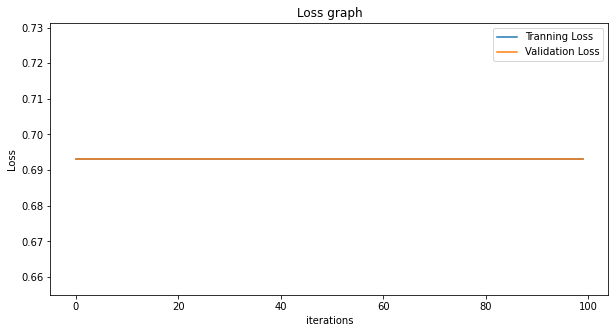

In [192]:
plt.figure(figsize=(10,5))
plt.title("Loss graph")
plt.plot(_tranning_loss,label="Tranning Loss")
plt.plot(_validation_loss,label="Validation Loss")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

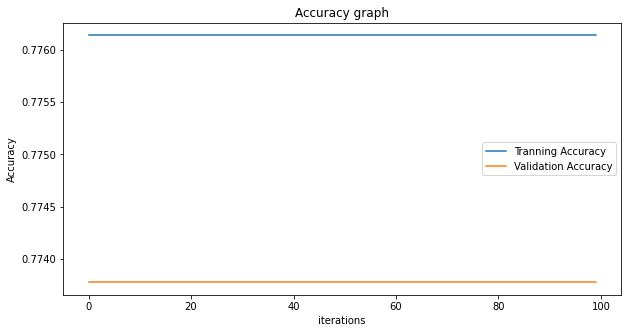

In [193]:
plt.figure(figsize=(10,5))
plt.title("Accuracy graph")
plt.plot(_tranning_acc,label="Tranning Accuracy")
plt.plot(_validation_acc,label="Validation Accuracy")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [194]:
y_true_tensor = torch.tensor([])
y_pred_tensor = torch.tensor([])
model.eval()
with torch.no_grad():
      for batch in valid_iter:
          text, text_lengths = batch.text
          predictions = model(text).squeeze(1)

          rounded_preds = torch.round(torch.sigmoid(predictions))
          correct = (rounded_preds == batch.polarity).float() 

          # print(rounded_preds,batch.polarity)

          y_true_tensor = torch.cat((y_true_tensor,batch.polarity))
          y_pred_tensor = torch.cat((y_pred_tensor,rounded_preds))
          # acc = binary_accuracy(predictions, batch.polarity)
          # print(acc)

In [195]:
y_true = y_true_tensor.type(torch.LongTensor).tolist()
y_pred = y_pred_tensor.type(torch.LongTensor).tolist()

In [196]:
matrice = confusion_matrix(y_true,y_pred)
matrice

array([[1598,    0],
       [ 461,    0]])

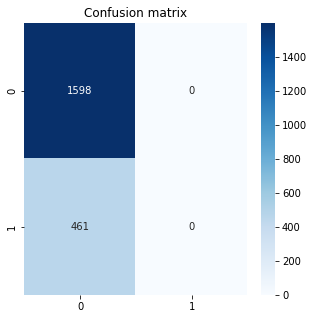

In [197]:
df_cm = pd.DataFrame(matrice,columns=[0,1],index=[0,1])
plt.figure(figsize=(5,5))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},fmt='g',cmap='Blues',)
plt.title(f"Confusion matrix")
plt.show()

In [198]:
classify_report = classification_report(y_true, y_pred, )
print(classify_report)


              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1598
           1       0.00      0.00      0.00       461

    accuracy                           0.78      2059
   macro avg       0.39      0.50      0.44      2059
weighted avg       0.60      0.78      0.68      2059

